<a href="https://colab.research.google.com/github/joooser/TENSORFLOW2/blob/main/Tumor_classiffier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import os
import zipfile

In [37]:
!wget --no-check-certificate https://storage.googleapis.com/platzi-tf2/TumorClassification.zip \
    -O /tmp/platzi-tf2/TumorClassification.zip

--2022-06-15 23:39:45--  https://storage.googleapis.com/platzi-tf2/TumorClassification.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 64.233.187.128, 2404:6800:4008:c05::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7460028 (7.1M) [application/zip]
Saving to: ‘/tmp/platzi-tf2/TumorClassification.zip’

/tmp/platzi-tf2/Tum 100%[===================>]   7.11M  --.-KB/s    in 0.06s   

2022-06-15 23:39:45 (112 MB/s) - ‘/tmp/platzi-tf2/TumorClassification.zip’ saved [7460028/7460028]



In [38]:
!wget --no-check-certificate https://storage.googleapis.com/platzi-tf2/TumorClassification.zip \
    -O /tmp/platzi-tf2/TumorClassification.zip

--2022-06-15 23:39:45--  https://storage.googleapis.com/platzi-tf2/TumorClassification.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 64.233.187.128, 2404:6800:4008:c05::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7460028 (7.1M) [application/zip]
Saving to: ‘/tmp/platzi-tf2/TumorClassification.zip’

/tmp/platzi-tf2/Tum 100%[===================>]   7.11M  --.-KB/s    in 0.06s   

2022-06-15 23:39:45 (124 MB/s) - ‘/tmp/platzi-tf2/TumorClassification.zip’ saved [7460028/7460028]



In [39]:
local_zip = "/tmp/platzi-tf2/TumorClassification.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("/tmp/platzi-tf2")
zip_ref.close()

In [40]:
initial_count = 0
dir = "/tmp/platzi-tf2/Train/NORMAL/"
for path in os.listdir(dir):
    if os.path.isfile(os.path.join(dir, path)):
        initial_count += 1
print(initial_count)

350


In [41]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import string
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import requests as requests
from PIL import Image
from io import BytesIO
import codecs
import json


In [42]:
train_dir = "/tmp/platzi-tf2/Train"
test_dir = "/tmp/platzi-tf2/Test"

In [110]:
train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255, validation_split= 0.25)

In [111]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (56, 56),
    batch_size = 128,
    class_mode = "categorical",
    color_mode = "grayscale",
    subset = "training"
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (56, 56),
    batch_size = 128,
    class_mode = "categorical",
    color_mode = "grayscale",
    subset = "validation"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (56, 56),
    batch_size = 128,
    class_mode = "categorical",
    color_mode = "grayscale"
)

Found 1050 images belonging to 3 classes.
Found 35 images belonging to 3 classes.
Found 144 images belonging to 3 classes.


In [112]:
classes = ["BENIGN", "MALIGNANT", "NORMAL"]

In [113]:
classes

['BENIGN', 'MALIGNANT', 'NORMAL']

In [114]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 5, figsize = (10, 10))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img[:,:,0])
    ax.axis("off")
  plt.tight_layout()
  plt.show()

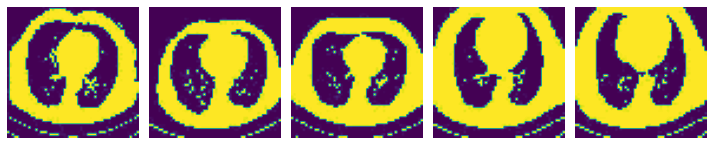

In [115]:
sample_training_images, _= next(train_generator)
plotImages(sample_training_images[10:15])

In [156]:
model_base = tf.keras.models.Sequential([
              tf.keras.layers.Flatten(input_shape= (56, 56, 1)),
              tf.keras.layers.Dense(256, activation = "relu"),
              tf.keras.layers.Dense(128, activation = "relu"),
              tf.keras.layers.Dense(len(classes), activation = "softmax")
])

In [157]:
model_base.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_16 (Flatten)        (None, 3136)              0         
                                                                 
 dense_48 (Dense)            (None, 256)               803072    
                                                                 
 dense_49 (Dense)            (None, 128)               32896     
                                                                 
 dense_50 (Dense)            (None, 3)                 387       
                                                                 
Total params: 836,355
Trainable params: 836,355
Non-trainable params: 0
_________________________________________________________________


In [158]:
model_base.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ['accuracy'])


history = model_base.fit(
    train_generator, 
    epochs= 20, 
    validation_data = validation_generator
)

Epoch 1/20
9/9 [==============================] - 1s 100ms/step - loss: 1.1715 - accuracy: 0.4590 - val_loss: 1.0280 - val_accuracy: 0.2857
Epoch 2/20
9/9 [==============================] - 1s 78ms/step - loss: 0.7148 - accuracy: 0.6762 - val_loss: 1.1749 - val_accuracy: 0.6286
Epoch 3/20
9/9 [==============================] - 1s 84ms/step - loss: 0.4985 - accuracy: 0.8019 - val_loss: 1.2383 - val_accuracy: 0.6286
Epoch 4/20
9/9 [==============================] - 1s 75ms/step - loss: 0.3213 - accuracy: 0.9029 - val_loss: 1.6380 - val_accuracy: 0.6286
Epoch 5/20
9/9 [==============================] - 1s 77ms/step - loss: 0.2114 - accuracy: 0.9495 - val_loss: 1.8864 - val_accuracy: 0.6286
Epoch 6/20
9/9 [==============================] - 1s 75ms/step - loss: 0.1281 - accuracy: 0.9752 - val_loss: 1.9127 - val_accuracy: 0.6286
Epoch 7/20
9/9 [==============================] - 1s 84ms/step - loss: 0.0756 - accuracy: 0.9943 - val_loss: 2.1153 - val_accuracy: 0.6286
Epoch 8/20
9/9 [==========

In [159]:
results = model_base.evaluate(test_generator)

2/2 [==============================] - 0s 13ms/step - loss: 3.0697 - accuracy: 0.5833


In [160]:
def visualizacion_resultados(history):
  epochs = [i for i in range(20)]
  fig, ax = plt.subplots(1,2)
  train_acc = history.history["accuracy"]
  train_loss = history.history["loss"]
  val_acc = history.history["val_accuracy"]
  val_loss = history.history["val_loss"]
  fig.set_size_inches(16, 9)

  ax[0].plot(epochs, train_acc, "go-", label =" Entrenamiento accuracy")
  ax[0].plot(epochs, val_acc, "ro-", label= "Validacion accuracy")
  ax[0].set_title("Entrenamiento & validación accuracy")
  ax[0].legend()
  ax[0].set_xlabel("Epochs")
  ax[0].set_ylabel("Accuracy")

  ax[1].plot(epochs, train_loss, "go-", label =" Entrenamiento Loss")
  ax[1].plot(epochs, val_loss, "ro-", label= "Validacion Loss")
  ax[1].set_title("Entrenamiento & validación Loss")
  ax[1].legend()
  ax[1].set_xlabel("Epochs")
  ax[1].set_ylabel("Loss")

  plt.show()

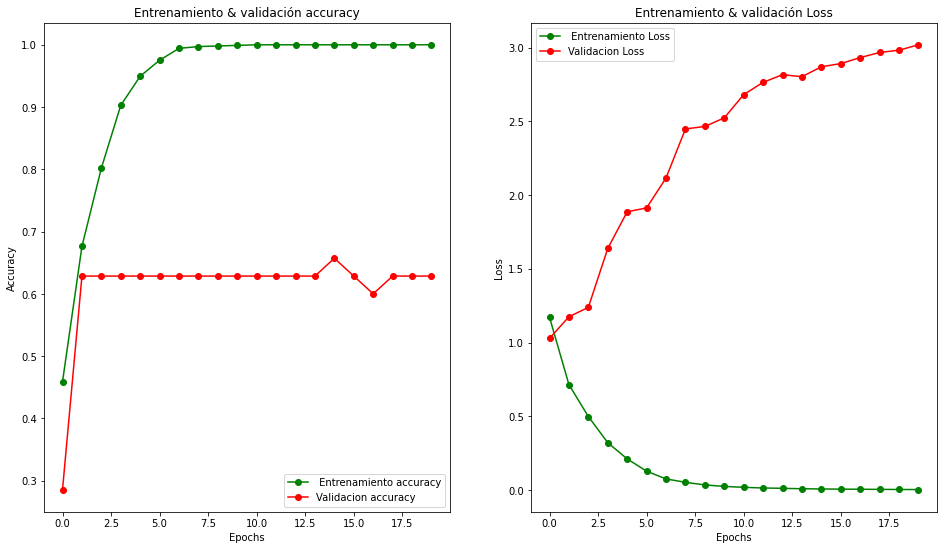

In [161]:
visualizacion_resultados(history)

In [162]:
from tensorflow.keras import regularizers

In [163]:
model_optimizer = tf.keras.models.Sequential([
              tf.keras.layers.Flatten(input_shape= (56, 56, 1)),
              tf.keras.layers.Dense(256, kernel_regularizer = regularizers.l2(1e-5), activation = "relu"),
              tf.keras.layers.Dropout(0.08),
              tf.keras.layers.Dense(128, kernel_regularizer= regularizers.l2(1e-5),activation = "relu"),
              tf.keras.layers.Dropout(0.08),
              tf.keras.layers.Dense(len(classes), activation = "softmax")
])

model_optimizer.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_17 (Flatten)        (None, 3136)              0         
                                                                 
 dense_51 (Dense)            (None, 256)               803072    
                                                                 
 dropout_22 (Dropout)        (None, 256)               0         
                                                                 
 dense_52 (Dense)            (None, 128)               32896     
                                                                 
 dropout_23 (Dropout)        (None, 128)               0         
                                                                 
 dense_53 (Dense)            (None, 3)                 387       
                                                                 
Total params: 836,355
Trainable params: 836,355
Non-t

In [164]:
model_optimizer.compile(optimizer= "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

history_optimizer = model_optimizer.fit(
    train_generator,
    epochs = 20,
    validation_data = validation_generator
)

Epoch 1/20
9/9 [==============================] - 2s 106ms/step - loss: 1.5341 - accuracy: 0.4400 - val_loss: 1.2811 - val_accuracy: 0.3143
Epoch 2/20
9/9 [==============================] - 1s 80ms/step - loss: 0.9320 - accuracy: 0.5705 - val_loss: 1.4009 - val_accuracy: 0.3429
Epoch 3/20
9/9 [==============================] - 1s 82ms/step - loss: 0.7205 - accuracy: 0.6857 - val_loss: 1.1699 - val_accuracy: 0.6000
Epoch 4/20
9/9 [==============================] - 1s 82ms/step - loss: 0.5393 - accuracy: 0.7657 - val_loss: 1.1964 - val_accuracy: 0.6286
Epoch 5/20
9/9 [==============================] - 1s 81ms/step - loss: 0.4023 - accuracy: 0.8543 - val_loss: 1.5960 - val_accuracy: 0.6286
Epoch 6/20
9/9 [==============================] - 1s 80ms/step - loss: 0.2959 - accuracy: 0.9105 - val_loss: 1.9344 - val_accuracy: 0.6286
Epoch 7/20
9/9 [==============================] - 1s 83ms/step - loss: 0.2113 - accuracy: 0.9438 - val_loss: 2.0533 - val_accuracy: 0.6286
Epoch 8/20
9/9 [==========

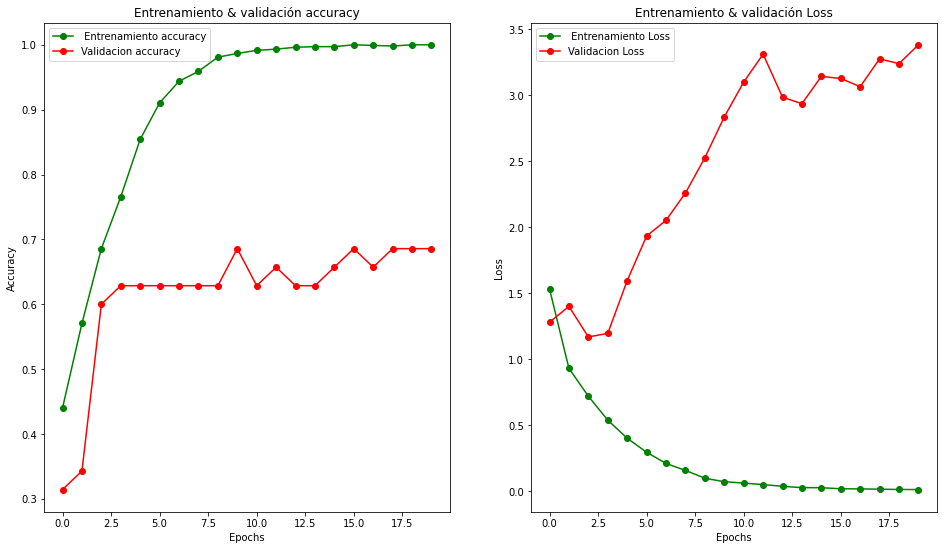

In [166]:
def visualizacion_resultados(history):
  epochs = [i for i in range(20)]
  fig, ax = plt.subplots(1,2)
  train_acc = history.history["accuracy"]
  train_loss = history.history["loss"]
  val_acc = history.history["val_accuracy"]
  val_loss = history.history["val_loss"]
  fig.set_size_inches(16, 9)

  ax[0].plot(epochs, train_acc, "go-", label =" Entrenamiento accuracy")
  ax[0].plot(epochs, val_acc, "ro-", label= "Validacion accuracy")
  ax[0].set_title("Entrenamiento & validación accuracy")
  ax[0].legend()
  ax[0].set_xlabel("Epochs")
  ax[0].set_ylabel("Accuracy")

  ax[1].plot(epochs, train_loss, "go-", label =" Entrenamiento Loss")
  ax[1].plot(epochs, val_loss, "ro-", label= "Validacion Loss")
  ax[1].set_title("Entrenamiento & validación Loss")
  ax[1].legend()
  ax[1].set_xlabel("Epochs")
  ax[1].set_ylabel("Loss")

  plt.show()

visualizacion_resultados(history_optimizer)

convoluciones


In [183]:
model_convolutional = tf.keras.models.Sequential([
              tf.keras.layers.Conv2D(32, (4,4), activation = "relu", input_shape= (56, 56, 1)),
              tf.keras.layers.MaxPool2D((2,2)),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(256, kernel_regularizer = regularizers.l2(1e-5), activation = "relu"),
              tf.keras.layers.Dropout(0.08),
              tf.keras.layers.Dense(128, kernel_regularizer= regularizers.l2(1e-5),activation = "relu"),
              tf.keras.layers.Dropout(0.08),
              tf.keras.layers.Dense(len(classes), activation = "softmax")
])

model_convolutional.summary()

model_convolutional.compile(optimizer= "Nadam", loss = "categorical_crossentropy", metrics = ["accuracy"])

history_convolutional = model_convolutional.fit(
    train_generator,
    epochs = 20,
    validation_data = validation_generator
)

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 53, 53, 32)        544       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 26, 26, 32)       0         
 g2D)                                                            
                                                                 
 flatten_32 (Flatten)        (None, 21632)             0         
                                                                 
 dense_97 (Dense)            (None, 256)               5538048   
                                                                 
 dropout_53 (Dropout)        (None, 256)               0         
                                                                 
 dense_98 (Dense)            (None, 128)               32896     
                                                     

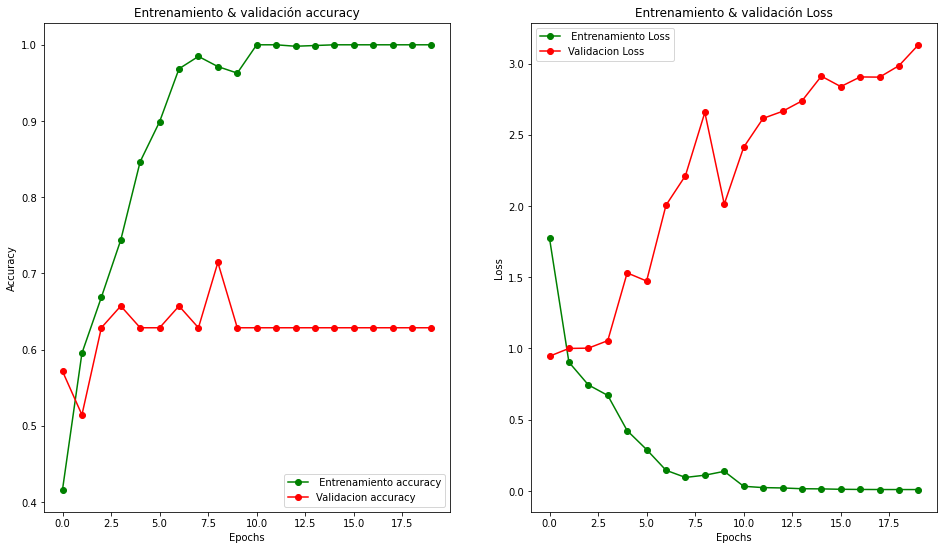

In [184]:
visualizacion_resultados(history_convolutional)

CALLBACKS

In [185]:
model_callback = tf.keras.models.Sequential([
              tf.keras.layers.Conv2D(75, (3,3), activation = "relu", input_shape= (56, 56, 1)),
              tf.keras.layers.MaxPool2D((2,2)),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(256, kernel_regularizer = regularizers.l2(1e-5), activation = "relu"),
              tf.keras.layers.Dropout(0.5),
              tf.keras.layers.Dense(128, kernel_regularizer= regularizers.l2(1e-5),activation = "relu"),
              tf.keras.layers.Dropout(0.5),
              tf.keras.layers.Dense(len(classes), activation = "softmax")
])

model_callback.summary()

model_callback.compile(optimizer= "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 54, 54, 75)        750       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 27, 27, 75)       0         
 g2D)                                                            
                                                                 
 flatten_33 (Flatten)        (None, 54675)             0         
                                                                 
 dense_100 (Dense)           (None, 256)               13997056  
                                                                 
 dropout_55 (Dropout)        (None, 256)               0         
                                                                 
 dense_101 (Dense)           (None, 128)               32896     
                                                     

In [186]:
from tensorflow.keras.callbacks import Callback

class TrainingCallback(Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if logs.get("accuracy") > 0.999:
      print("Lo logramos, nuestro modelo llego a 95%, detenemos el entrenamiento")
      self.model.stop_training = True

In [188]:
callback = TrainingCallback()

history_callback = model_callback.fit(
    train_generator,
    epochs = 20,
    callbacks = [callback],
    validation_data = validation_generator
)

Epoch 1/20
9/9 [==============================] - 7s 799ms/step - loss: 0.3560 - accuracy: 0.8648 - val_loss: 1.4222 - val_accuracy: 0.6286
Epoch 2/20
9/9 [==============================] - 8s 815ms/step - loss: 0.2290 - accuracy: 0.9314 - val_loss: 1.5253 - val_accuracy: 0.6571
Epoch 3/20
9/9 [==============================] - 8s 846ms/step - loss: 0.1529 - accuracy: 0.9552 - val_loss: 1.5995 - val_accuracy: 0.6286
Epoch 4/20
9/9 [==============================] - 8s 817ms/step - loss: 0.1260 - accuracy: 0.9581 - val_loss: 1.8560 - val_accuracy: 0.6286
Epoch 5/20
9/9 [==============================] - 7s 813ms/step - loss: 0.0768 - accuracy: 0.9848 - val_loss: 1.8008 - val_accuracy: 0.6286
Epoch 6/20
9/9 [==============================] - 8s 891ms/step - loss: 0.0590 - accuracy: 0.9867 - val_loss: 2.0364 - val_accuracy: 0.6286
Epoch 7/20
9/9 [==============================] - 7s 804ms/step - loss: 0.0488 - accuracy: 0.9895 - val_loss: 2.1173 - val_accuracy: 0.6286
Epoch 8/20
9/9 [====

In [189]:
def get_model():
  model = tf.keras.models.Sequential([
              tf.keras.layers.Conv2D(75, (3,3), activation = "relu", input_shape= (56, 56, 1)),
              tf.keras.layers.MaxPool2D((2,2)),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(256, kernel_regularizer = regularizers.l2(1e-5), activation = "relu"),
              tf.keras.layers.Dropout(0.5),
              tf.keras.layers.Dense(128, kernel_regularizer= regularizers.l2(1e-5),activation = "relu"),
              tf.keras.layers.Dropout(0.5),
              tf.keras.layers.Dense(len(classes), activation = "softmax")
  ])
  return model

model_early = get_model()
model_early.summary()

model_early.compile(optimizer= "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 54, 54, 75)        750       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 27, 27, 75)       0         
 g2D)                                                            
                                                                 
 flatten_34 (Flatten)        (None, 54675)             0         
                                                                 
 dense_103 (Dense)           (None, 256)               13997056  
                                                                 
 dropout_57 (Dropout)        (None, 256)               0         
                                                                 
 dense_104 (Dense)           (None, 128)               32896     
                                                     

early stopping

In [191]:
callback_early = tf.keras.callbacks.EarlyStopping(monitor = "loss", patience=3, mode = "auto")

In [ ]:
history_early = model_early.fit(
    train_generator, 
    epochs= 20, 
    callbacks = [callback_early],
    validation_data = validation_generator
)

Epoch 1/20
9/9 [==============================] - 8s 816ms/step - loss: 1.9110 - accuracy: 0.4124 - val_loss: 1.0148 - val_accuracy: 0.6286
Epoch 2/20
9/9 [==============================] - 7s 782ms/step - loss: 0.9964 - accuracy: 0.5476 - val_loss: 0.9819 - val_accuracy: 0.5714
Epoch 3/20
9/9 [==============================] - 7s 773ms/step - loss: 0.7620 - accuracy: 0.6619 - val_loss: 0.9923 - val_accuracy: 0.6286
Epoch 4/20
9/9 [==============================] - 7s 767ms/step - loss: 0.5803 - accuracy: 0.7714 - val_loss: 1.0669 - val_accuracy: 0.6571
Epoch 5/20
9/9 [==============================] - 7s 759ms/step - loss: 0.4131 - accuracy: 0.8438 - val_loss: 1.1546 - val_accuracy: 0.6571
Epoch 6/20
9/9 [==============================] - 7s 750ms/step - loss: 0.3038 - accuracy: 0.9067 - val_loss: 1.4134 - val_accuracy: 0.6571
Epoch 7/20
9/9 [==============================] - 7s 802ms/step - loss: 0.2044 - accuracy: 0.9324 - val_loss: 1.6763 - val_accuracy: 0.6286
Epoch 8/20
9/9 [====

## Creamos nuestra modelo funcional con Auto Tunner Keras

In [ ]:
!pip install -q -U keras-tuner
import keras_tuner as kt
from tensorflow import keras

In [ ]:
def constructor_modelos(hp):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Conv2D(64, (3,3), activation= "relu", input_shape = (56, 56, 1)))
  model.add(tf.keras.layers.MaxPool2D((2,2)))
  model.add(tf.keras.layers.Flatten())

  hp_units = hp.Int("units", min_value = 32, max_value = 512, step = 32)
  model.add(tf.keras.layers.Dense(units=hp_units,activation = "relu", kernel_regularizer= regularizers.l2(1e-5)))
  model.add(tf.keras.layers.Dropout(0.4))
  model.add(tf.keras.layers.Dense(128,activation = "relu", kernel_regularizer= regularizers.l2(1e-5)))
  model.add(tf.keras.layers.Dropout(0.4))
  model.add(tf.keras.layers.Dense(len(classes), activation = "softmax"))

  hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4])

  model.compile(optimizer = keras.optimizers.Adam(learning_rate=hp_learning_rate),loss = "categorical_crossentropy", metrics = ["accuracy"])

  return model

In [ ]:
tuner = kt.Hyperband(
    constructor_modelos,
    objective = "val_accuracy",
    max_epochs = 30,
    factor = 3,
    directory = "models/",
    project_name = "tunner")

INFO:tensorflow:Reloading Oracle from existing project models/tunner/oracle.json
INFO:tensorflow:Reloading Tuner from models/tunner/tuner0.json


In [ ]:
tuner.search(train_generator, epochs =50, validation_data = validation_generator)

best_hps = tuner.get_best_hyperparameters(num_trials =5)[0]

INFO:tensorflow:Oracle triggered exit


In [ ]:
print(best_hps.get("units"))

416


In [ ]:
print(best_hps.get("learning_rate"))

0.001


In [ ]:
hypermodel = tuner.hypermodel.build(best_hps)

history_hypermodel = hypermodel.fit(
    train_generator,
    epochs = 50,
    callbacks = [callback_early],
    validation_data = validation_generator
)

Epoch 1/50
17/17 [==============================] - 10s 505ms/step - loss: 1.9500 - accuracy: 0.4352 - val_loss: 0.9268 - val_accuracy: 0.5000
Epoch 2/50
17/17 [==============================] - 8s 491ms/step - loss: 0.9453 - accuracy: 0.5590 - val_loss: 0.9132 - val_accuracy: 0.5714
Epoch 3/50
17/17 [==============================] - 8s 488ms/step - loss: 0.5894 - accuracy: 0.7505 - val_loss: 1.6189 - val_accuracy: 0.6429
Epoch 4/50
17/17 [==============================] - 8s 507ms/step - loss: 0.2978 - accuracy: 0.8990 - val_loss: 1.4495 - val_accuracy: 0.6429
Epoch 5/50
17/17 [==============================] - 8s 485ms/step - loss: 0.1377 - accuracy: 0.9629 - val_loss: 1.8069 - val_accuracy: 0.6429
Epoch 6/50
17/17 [==============================] - 8s 480ms/step - loss: 0.0661 - accuracy: 0.9895 - val_loss: 2.1124 - val_accuracy: 0.7143
Epoch 7/50
17/17 [==============================] - 8s 484ms/step - loss: 0.0434 - accuracy: 0.9924 - val_loss: 2.1083 - val_accuracy: 0.6786
Epoch